## Example ##

## $$ h(x) = \frac{\pi}{2} -  |x| \quad \quad x\in [-\pi, \pi]$$ ##


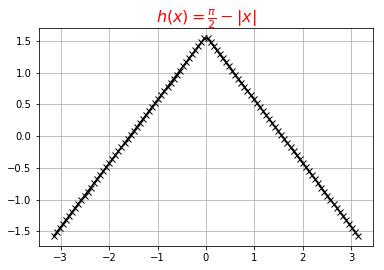

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import math as m

def h(x):
    return np.pi/2 - np.fabs(x)

X = np.linspace(-m.pi, m.pi,100)

plt.plot(X,h(X),'k-x');
plt.title(r"$h(x) = \frac{\pi}{2}-|x|$", fontsize = 16, color = 'r')
plt.grid(True)
plt.show()

## $$ S_n(h,x) = \sum_{k=0}^{n} \frac{4cos[(2k+1)x]}{\pi(2k+1)^2} $$ ##


## $$ \sigma_n(h,x) = \frac{1}{2\pi}\int_{-\pi}^{\pi} \left(\frac{\pi}{2} - |t| \right)\frac{1}{n+1}\left(\frac{sin[(n+1)\frac{(x-t)}{2}]}{sin(\frac{x-t}{2})}\right)^2 dt $$ ## 

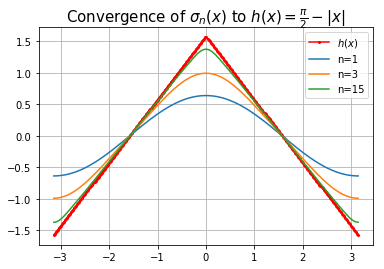

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import math as m
from scipy.integrate import quad

def h(x):
    return np.pi/2 - np.fabs(x)

def S(n,x):    
    sum = 0
    for k in range(n+1):
        sum += 4*np.cos((2*k+1)*x)/(np.pi*(2*k+1)**2)
    return sum

def Sig(n,x):
    
    def Kernel(n,x):
        if x!= 0:
            return ((np.sin((n+1)*(x)/2))/np.sin((x)/2))**2/(n+1)
        else: 
            return n+1 
    
    integrand = lambda t,n,x: h(t)*Kernel(n,x-t)/(2*np.pi)
    return quad(integrand, -np.pi, np.pi, args=(n, x))[0]


#X = [np.pi*np.cos(((2*k-1)/200)*np.pi) for k in range(1,101)]      #chebychev points
X = np.linspace(-np.pi,np.pi,300)

#print('''I have only plotted the graphs of n=%s''' %(n))


plt.plot(X,[h(x) for x in X],'r-o',label = r'$h(x)$',markersize = 2)
plt.legend()

#plt.title(r"$h(x) = \frac{\pi}{2}-|x|$", fontsize = 16, color = 'r')


#plt.plot(X,[S(n,x) for x in X],'r-x');
#plt.title(r"$S_n(h,x)$", fontsize = 16, color = 'b')
#plt.grid(True)
#plt.show()

for n in [1,3,15]:
    plt.plot(X,[(Sig(n,x)) for x in X],label ='n=%d' %(n));
    plt.title(r"Convergence of $\sigma_n(x)$ to $h(x) = \frac{\pi}{2}-|x|$", fontsize = 15, color = 'k')
    plt.legend()
    
plt.grid(True)    
#plt.gcf().set_size_inches(10.5, 8);
plt.savefig('graph1.eps', format='eps', dpi=1000)

Differences between h(x) and S_n(h,x) and Sigma_n(h,x) where I have taken n=2


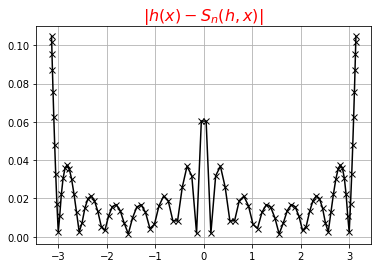

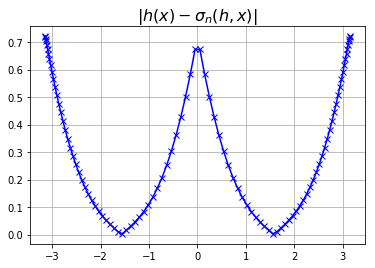

In [21]:
dsum = [np.abs(h(x) - S(n,x)) for x in X]
dsigma = [np.abs(h(x) - Sig(n,x)) for x in X]

print('''Differences between h(x) and S_n(h,x) and Sigma_n(h,x) where I have taken n=%s''' %(n))

plt.plot(X,dsum,'k-x');
plt.title(r"$|h(x) - S_n(h,x)|$", fontsize = 16, color = 'r')
plt.grid(True)
plt.show()

plt.plot(X,dsigma,'b-x');
plt.grid(True)
plt.title(r"$|h(x) - \sigma_n(h,x)|$", fontsize = 16, color = 'k')
plt.show()